#(00) Imports and Functions

In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

custom_params = {"axes.spines.right": True, "axes.spines.top": True}
sns.set_theme(style = 'white', rc=custom_params)
sns.color_palette('dark', as_cmap=True)


def line(p1, p2):
  x1, y1 = p1
  x2, y2 = p2
  a = (y2-y1)/(x2-x1)
  b = y1 - a*x1
  return a, b


def target_function(a, b, x):
  f = a*x[:,1] + b
  y_val = x[:,2] - f
  y_sign = np.sign(y_val)
  return np.reshape(y_sign, (-1, 1))


def hypothesis(w, x):
  h = np.sign(
      np.array(
          [np.dot(np.transpose(w), x[point,:]) for point in range(0, np.size(x,0))]
          ))
  return h


def perceptron(x, y):
  '''
  '''
  w = np.zeros((np.size(x,1),1))
  iter = 0
  h = hypothesis(w, x)

  while any(h != y):
    comp = h != y
    miss_points, _ = np.where(comp)  # Missclassified points
    index = np.random.randint(0, len(miss_points))  # Pick a point at random
    w += np.reshape(y[miss_points[index]]*x[miss_points[index],:], (-1, 1))
    h = hypothesis(w, x)
    iter += 1
    #print('|<----- Iteração', iter ,'----->|')
    #if iter >= 100: break

  print('|<----- Iteração', iter ,'----->|')
  return w


def differs(a, b, w, x):
  f_sign = target_function(a, b, x)
  g_sign = np.reshape((np.sign(x[:,2] - (-w[0]/w[2] - (w[1]/w[2])*x[:,1]))), (-1, 1))
  if any(g_sign != f_sign):
    return 1
  else:
    return 0

#(7)(8)(9)(10) The Perceptron Learning Algorithm

|<----- Iteração 77 ----->|
Weights = 
 [[ 3.        ]
 [-0.04724362]
 [ 7.35936916]]


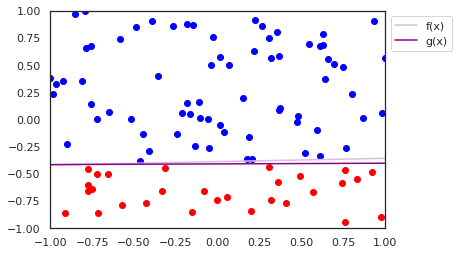

In [6]:
#----------> Target Function
p1 = np.random.uniform(-1,1,2)
p2 = np.random.uniform(-1,1,2)
a, b = line(p1, p2)  # target function coefficients

#----------> Training Set
N = 100   # data points
d = 2   # dimensions
x0 = np.ones((N,1))
x1n = np.random.uniform(low = -1, high = 1, size = (N,d))
x = np.concatenate((x0, x1n), axis = 1)
y = target_function(a, b, x)

#----------> Results
w = perceptron(x, y)
points = np.concatenate((x, y), 1)
print('Weights = \n', w)

#----------> Plots
plt.figure()
xplot = np.linspace(-1, 1, 100)
fplot = a*xplot + b
plt.plot(xplot, fplot, color='thistle', label='f(x)')

g1 = np.linspace(-1, 1, 100)
g2 = -w[0]/w[2] - (w[1]/w[2])*g1
plt.plot(g1, g2, color = 'darkmagenta', label='g(x)')

for ind in range(0, np.size(x,0)):
  if points[ind,-1] == 1.0:
    plt.scatter(points[ind,1], points[ind,2], color='blue')
  else:
    plt.scatter(points[ind,1], points[ind,2], color='red')
 
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [5]:
diff_count = 0
num = int(1e5)

for _ in range(0, num):
  r = np.random.uniform(-1, 1, (2,2))
  x = np.concatenate((np.ones((2,1)), r), axis = 1)
  if differs(a, b, w, x) != 1:
    continue
  else:
    diff_count += 1

diff_frac = diff_count/num
print('P[f(x)≠g(x)](N =', N, ') = ', diff_frac)

P[f(x)≠g(x)](N = 100 ) =  0.01338
